We are going to track the Birds over a map (using cartopy).

In [5]:
import pandas as pd 
from cartopy import crs as ccrs 
from cartopy import feature as cfeature 
import matplotlib.pyplot as plt 
%matplotlib inline

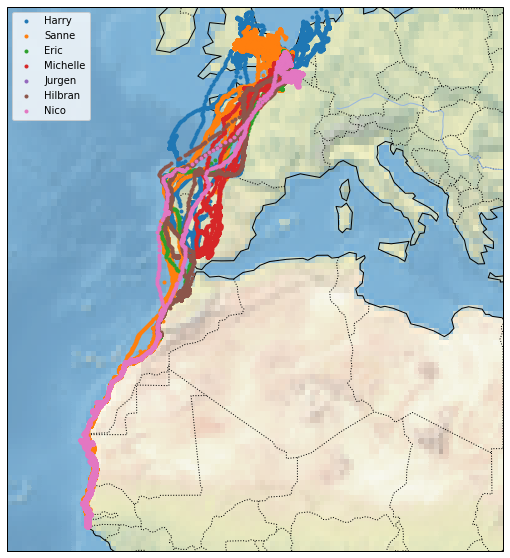

In [26]:
birddata = pd.read_csv("Datasets/bird_tracking.csv", low_memory=False) 
bird_names = pd.unique(birddata.bird_name) 

# To move forward, we need to specify a specific projection that we're interested in using. 
proj = ccrs.Mercator() 

plt.figure(figsize=(10,10)) 
ax = plt.axes(projection=proj) 
ax.set_extent((-25.0, 25.0, 52.0, 10.0)) 

ax.stock_img()

states_provinces = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND) 
ax.add_feature(cfeature.OCEAN) 
ax.add_feature(cfeature.COASTLINE) 
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(states_provinces, edgecolor='gray')
for name in bird_names: 
	ix = birddata['bird_name'] == name 
	x,y = birddata.longitude[ix], birddata.latitude[ix] 
	ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=name) 
plt.legend(loc="upper left") 
plt.show() 
